In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

import trendfilterpy as tfpy
from trendfilterpy._estimator import TrendFilterRegression

rng = np.random.default_rng()

In [8]:
df = (
    pl.read_csv("data/french_AL_data.csv")
    .with_columns(pl.col("Area", "VehBrand", "VehGas", "Region").cast(pl.Categorical).to_physical())
    .sample(100000)
)

In [ ]:
model = TrendFilterRegression(dist=tfpy.TweedieDistribution(p=1.7), link=tfpy.LogLink(), lam=0.1)
model.fit(
    df.drop("IDpol", "ClaimNb", "ClaimAmount", "PurePremium"), df["PurePremium"], categorical_features=[1, 6, 7, 9]
)

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) Jan 26 01:40:44 PM: Your problem has 2000 variables, 6 constraints, and 0 parameters.
(CVXPY) Jan 26 01:40:44 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 26 01:40:44 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 26 01:40:44 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 26 01:40:44 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 26 01:40:44 PM: Compiling problem (target solver=CLARABEL)

TrendFilterRegression(dist=<trendfilterpy._dists.TweedieDistribution object at 0x30ab9b790>,
                      lam=0.01,
                      link=<trendfilterpy._links.LogLink object at 0x17f73bee0>)

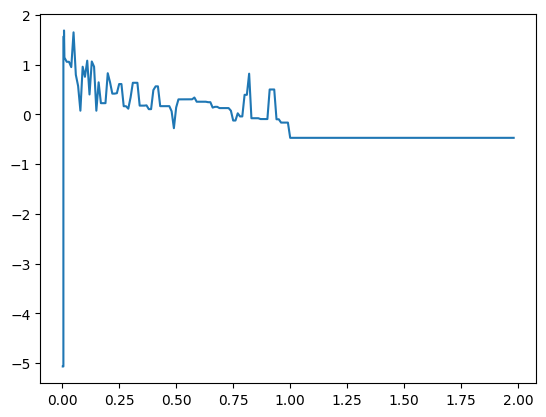

In [13]:
i = 0
plt.plot(model.vars_[i].unique_vals, model.vars_[i].beta)